In [1]:
import pandas as pd
import lzma
import numpy as np
import matplotlib.pyplot as plt
import os, glob
from scipy.stats import t as tstudent

In [110]:
def fetch_results(horizon: int, method: str):
    files = []
    for file in glob.glob(f"results/inventory/{method}/horizon_{horizon}/*conformal.csv"):
        files.append(file)
    return files

def compute_CE(mu, std, N: int, c = 0.95):
    alpha = c + (1-c)/2
    c = tstudent.ppf(alpha, N)
    return c * std/ np.sqrt(N)

In [135]:
METHODS = ['empirical']
HORIZONS = [20,25,40]
epsilons = np.linspace(0, 1, 21)
scores_names = []
data = {}

for method in METHODS:
    data[method] = {}
    for horizon in HORIZONS:
        files = fetch_results(horizon, method)
        data[method][horizon] = {}
        for file_id, file in enumerate(files):
            data[method][horizon][file_id] = pd.read_csv('./' + file)
            data[method][horizon][file_id] = data[method][horizon][file_id][(data[method][horizon][file_id]["epsilon"] >= 0.30) & (data[method][horizon][file_id]["epsilon"] <= 0.65)]
            epsilons = data[method][horizon][file_id]["epsilons"].to_numpy()


In [154]:
data["empirical"][40][0][(data["empirical"][40][0]["epsilon"] >= 0.30) & (data["empirical"][40][0]["epsilon"] <= 0.65)]["epsilon"].to_numpy()

array([0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65])

Text(0.5, 0.98, 'Confidence Intervals - Empirical method')

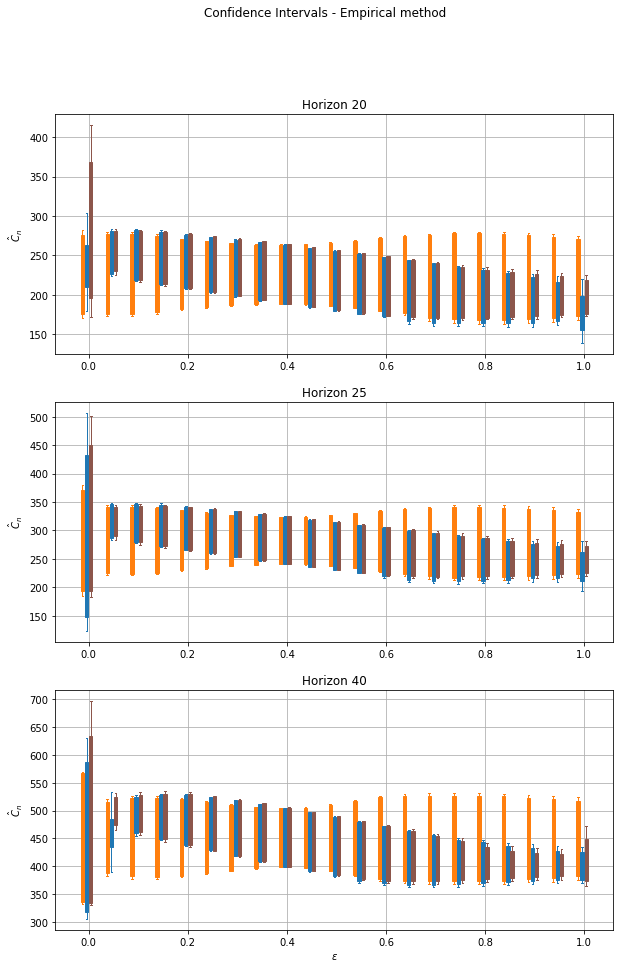

In [112]:

def compute_mean_std(key: str, method: str, horizon: int):
    mu = []
    std = []
    n = 0
    data_m_h = data[method][horizon]
    for id_run in data_m_h:
        n += 1
        mu.append(data_m_h[id_run][f'avg_{key}'].to_numpy())
        std.append(data_m_h[id_run][f'std_{key}'].to_numpy())
    
    mu = np.array(mu)
    std = np.array(std)
    return mu.mean(axis=0), mu.std(ddof=1,axis=0) + std.mean(axis=0), n

keys = {
    'Original score': {
        'lower': 'interval_target_lower',
        'upper': 'interval_target_upper',
        'color': 'tab:orange'
    },
    'Double quantile score': {
        'lower': 'interval_target_double_lower',
        'upper': 'interval_target_double_upper',
        'color': 'tab:blue'
    },
    'Cumulative score': {
        'lower': 'interval_target_cumul_lower',
        'upper': 'interval_target_cumul_upper',
        'color': 'tab:brown'
    }
    
}
     # if id > 0:
        #     plt.plot(epsilons, mu_lower_original)
        # else:
        #     plt.plot(epsilons, mu_lower_original, label = name)
        # plt.fill_between(
        #     epsilons,
        #     mu_lower_original - ce_lower_original,
        #     mu_lower_original + ce_lower_original, alpha=0.2)

fig, ax = plt.subplots(len(HORIZONS), figsize=(10,15))

bps = []
labels= []
for hid, horizon in enumerate(HORIZONS):
    for name_id, name in enumerate(keys):
        mu_lower_original, std_lower_original, n_lower_original = compute_mean_std(keys[name]['lower'], 'empirical', horizon)
        ce_lower_original = compute_CE(mu_lower_original, std_lower_original, n_lower_original)
        
        mu_upper_original, std_upper_original, n_upper_original = compute_mean_std(keys[name]['upper'], 'empirical', horizon)
        ce_upper_original = compute_CE(mu_upper_original, std_upper_original, n_upper_original)
    
        
        median = (mu_upper_original + mu_lower_original)/2
        boxes = [
            {
                'label' : name,
                'whislo': mu_lower_original[id] - ce_lower_original[id],    # Bottom whisker position
                'q1'    : mu_lower_original[id],    # First quartile (25th percentile)
                'med'   : median[id],    # Median         (50th percentile)
                'q3'    : mu_upper_original[id],    # Third quartile (75th percentile)
                'whishi': mu_upper_original[id] + ce_upper_original[id],    # Top whisker position
                'fliers': []        # Outliers
            }
            for id in range(len(epsilons))
        ]
        offset = -0.0125 + 0.0125/1.5 * name_id
        bp = ax[hid].bxp(boxes, epsilons + offset, widths=0.007, showfliers=False, patch_artist=True, manage_ticks=False, showmeans=False)
        
        if hid == 0:
            bps.append(bp)
            labels.append(name)
        for element in ['boxes', 'whiskers', 'fliers', 'caps']:
            plt.setp(bp[element], color=keys[name]['color'])
            
        plt.setp(bp['medians'], linewidth=0)
        ax[hid].grid()
        ax[hid].set_title(f'Horizon {horizon}')
        ax[hid].set_ylabel(r'$\hat C_n$')
        
    #ax.set_xticks(epsilons)
    
#ax[0].legend([bp["boxes"][0] for bp in bps], labels, loc='upper right')

plt.xlabel(r'$\varepsilon$')
#plt.ylabel(r'$\hat C_n$')
fig.suptitle("Confidence Intervals - Empirical method")
#fig.savefig('figures/inventory/Confidence_intervals_gradient_IS.pdf')
#plt.show()

In [113]:
def fetch_results(horizon: int, method: str):
    files = []
    for file in glob.glob(f"results/inventory/{method}/horizon_{horizon}/*IS.csv"):
        files.append(file)
    return files

def compute_CE(mu, std, N: int, c = 0.95):
    alpha = c + (1-c)/2
    c = tstudent.ppf(alpha, N)
    return c * std/ np.sqrt(N)

In [114]:
METHODS = ['empirical']
HORIZONS = [20,25,40]
epsilons = np.linspace(0, 1, 21)
scores_names = []
data = {}

for method in METHODS:
    data[method] = {}
    for horizon in HORIZONS:
        files = fetch_results(horizon, method)
        data[method][horizon] = {}
        for file_id, file in enumerate(files):
            data[method][horizon][file_id] = pd.read_csv('./' + file)
            data[method][horizon][file_id] = data[method][horizon][file_id][(data[method][horizon][file_id]["epsilon"] >= 0.30) & (data[method][horizon][file_id]["epsilon"] <= 0.65)]

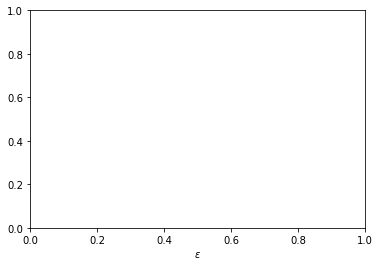

In [115]:
keys = {
    'Importance Sampling': {
        'lower': 'interval_target_lower',
        'upper': 'interval_target_upper',
        'color': 'tab:green'
    }
    
}
     # if id > 0:
        #     plt.plot(epsilons, mu_lower_original)
        # else:
        #     plt.plot(epsilons, mu_lower_original, label = name)
        # plt.fill_between(
        #     epsilons,
        #     mu_lower_original - ce_lower_original,
        #     mu_lower_original + ce_lower_original, alpha=0.2)

#fig, ax = plt.subplots(len(HORIZONS), figsize=(10,15))

#bps = []
#labels= []
for hid, horizon in enumerate(HORIZONS):
    for name_id, name in enumerate(keys):
        mu_lower_original, std_lower_original, n_lower_original = compute_mean_std(keys[name]['lower'], 'empirical', horizon)
        ce_lower_original = compute_CE(mu_lower_original, std_lower_original, n_lower_original)
        
        mu_upper_original, std_upper_original, n_upper_original = compute_mean_std(keys[name]['upper'], 'empirical', horizon)
        ce_upper_original = compute_CE(mu_upper_original, std_upper_original, n_upper_original)
    
        
        median = (mu_upper_original + mu_lower_original)/2
        boxes = [
            {
                'label' : name,
                'whislo': mu_lower_original[id] - ce_lower_original[id],    # Bottom whisker position
                'q1'    : mu_lower_original[id],    # First quartile (25th percentile)
                'med'   : median[id],    # Median         (50th percentile)
                'q3'    : mu_upper_original[id],    # Third quartile (75th percentile)
                'whishi': mu_upper_original[id] + ce_upper_original[id],    # Top whisker position
                'fliers': []        # Outliers
            }
            for id in range(len(epsilons))
        ]
        offset = -0.0125 + 0.0125/1.5 * 3
        bp = ax[hid].bxp(boxes, epsilons + offset, widths=0.007, showfliers=False, patch_artist=True, manage_ticks=False, showmeans=False)
        
        if hid == 0:
            bps.append(bp)
            labels.append(name)
        for element in ['boxes', 'whiskers', 'fliers', 'caps']:
            plt.setp(bp[element], color=keys[name]['color'])
            
        plt.setp(bp['medians'], linewidth=0)
        #ax[hid].grid()
        #ax[hid].set_title(f'Horizon {horizon}')
        #ax[hid].set_ylabel(r'$\hat C_n$')
        
    #ax.set_xticks(epsilons)
    
ax[0].legend([bp["boxes"][0] for bp in bps], labels, loc='upper right')

plt.xlabel(r'$\varepsilon$')
#plt.ylabel(r'$\hat C_n$')
#fig.suptitle("Confidence Intervals - Gradient method")
fig.savefig('figures/inventory/Confidence_intervals_empirical_IS.pdf')
#plt.show()

In [121]:
def fetch_results(horizon: int, method: str):
    files = []
    for file in glob.glob(f"results/inventory/{method}/horizon_{horizon}/*conformal.csv"):
        files.append(file)
    return files

def compute_CE(mu, std, N: int, c = 0.95):
    alpha = c + (1-c)/2
    c = tstudent.ppf(alpha, N)
    return c * std/ np.sqrt(N)

METHODS = ['empirical']
HORIZONS = [20,25,40]
epsilons = np.linspace(0, 1, 21)
scores_names = []
data = {}

for method in METHODS:
    data[method] = {}
    for horizon in HORIZONS:
        files = fetch_results(horizon, method)
        data[method][horizon] = {}
        for file_id, file in enumerate(files):
            data[method][horizon][file_id] = pd.read_csv('./' + file)
            data[method][horizon][file_id] = data[method][horizon][file_id][(data[method][horizon][file_id]["epsilon"] >= 0.30) & (data[method][horizon][file_id]["epsilon"] <= 0.65)]

In [122]:
horizon_lengths = []
horizon_coverage = []
horizon_lengths_double = []
horizon_coverage_double = []
horizon_lengths_cumul = []
horizon_coverage_cumul = []
horizon_lengths_std = []
horizon_coverage_std = []
horizon_lengths_std_double = []
horizon_coverage_std_double = []
horizon_lengths_std_cumul = []
horizon_coverage_std_cumul = []
num_runs = []
#horizons = [5,10,15,20,25]

for method in METHODS:
    for horizon in HORIZONS:
        avg_length = []
        avg_length_double = []
        avg_length_cumul = []
        coverage = []
        coverage_double = []
        coverage_cumul = []
        files = fetch_results(horizon, method)
        for file_id, file in enumerate(files):

            avg_length = data[method][horizon][file_id]["avg_length"].to_numpy() if len(avg_length) == 0 else np.vstack((avg_length, data[method][horizon][file_id]["avg_length"].to_numpy()))
            avg_length_double = data[method][horizon][file_id]["avg_length_double"].to_numpy() if len(avg_length_double) == 0 else np.vstack((avg_length_double, data[method][horizon][file_id]["avg_length_double"].to_numpy()))
            avg_length_cumul = data[method][horizon][file_id]["avg_length_cumul"].to_numpy() if len(avg_length_cumul) == 0 else np.vstack((avg_length_cumul, data[method][horizon][file_id]["avg_length_cumul"].to_numpy()))

            coverage = data[method][horizon][file_id]["coverage"].to_numpy() if len(coverage) == 0 else np.vstack((coverage, data[method][horizon][file_id]["coverage"].to_numpy()))
            coverage_double = data[method][horizon][file_id]["coverage_double"].to_numpy() if len(coverage_double) == 0 else np.vstack((coverage_double, data[method][horizon][file_id]["coverage_double"].to_numpy()))
            coverage_cumul = data[method][horizon][file_id]["coverage_cumul"].to_numpy() if len(coverage_cumul) == 0 else np.vstack((coverage_cumul, data[method][horizon][file_id]["coverage_cumul"].to_numpy()))
        num_runs.append(len(files))
        horizon_lengths.append(np.mean(avg_length, 0))
        horizon_coverage.append(np.mean(coverage, 0))
        horizon_lengths_double.append(np.mean(avg_length_double, 0))
        horizon_coverage_double.append(np.mean(coverage_double, 0))
        horizon_lengths_cumul.append(np.mean(avg_length_cumul, 0))
        horizon_coverage_cumul.append(np.mean(coverage_cumul, 0))

        horizon_lengths_std.append(np.std(avg_length, 0))
        horizon_coverage_std.append(np.std(coverage, 0))
        horizon_lengths_std_double.append(np.std(avg_length_double, 0))
        horizon_coverage_std_double.append(np.std(coverage_double, 0))
        horizon_lengths_std_cumul.append(np.std(avg_length_cumul, 0))
        horizon_coverage_std_cumul.append(np.std(coverage_cumul, 0))

num_runs = np.array(num_runs)
horizon_lengths = np.array(horizon_lengths)
horizon_coverage = np.array(horizon_coverage)
horizon_lengths_double = np.array(horizon_lengths_double)
horizon_coverage_double = np.array(horizon_coverage_double)
horizon_lengths_cumul = np.array(horizon_lengths_cumul)
horizon_coverage_cumul = np.array(horizon_coverage_cumul)
horizon_lengths_std = np.array(horizon_lengths_std)
horizon_coverage_std = np.array(horizon_coverage_std)
horizon_lengths_std_double = np.array(horizon_lengths_std_double)
horizon_coverage_std_double = np.array(horizon_coverage_std_double)
horizon_lengths_std_cumul = np.array(horizon_lengths_std_cumul)
horizon_coverage_std_cumul = np.array(horizon_coverage_std_cumul)

In [61]:
num_runs

array([30, 25, 24, 26, 22])

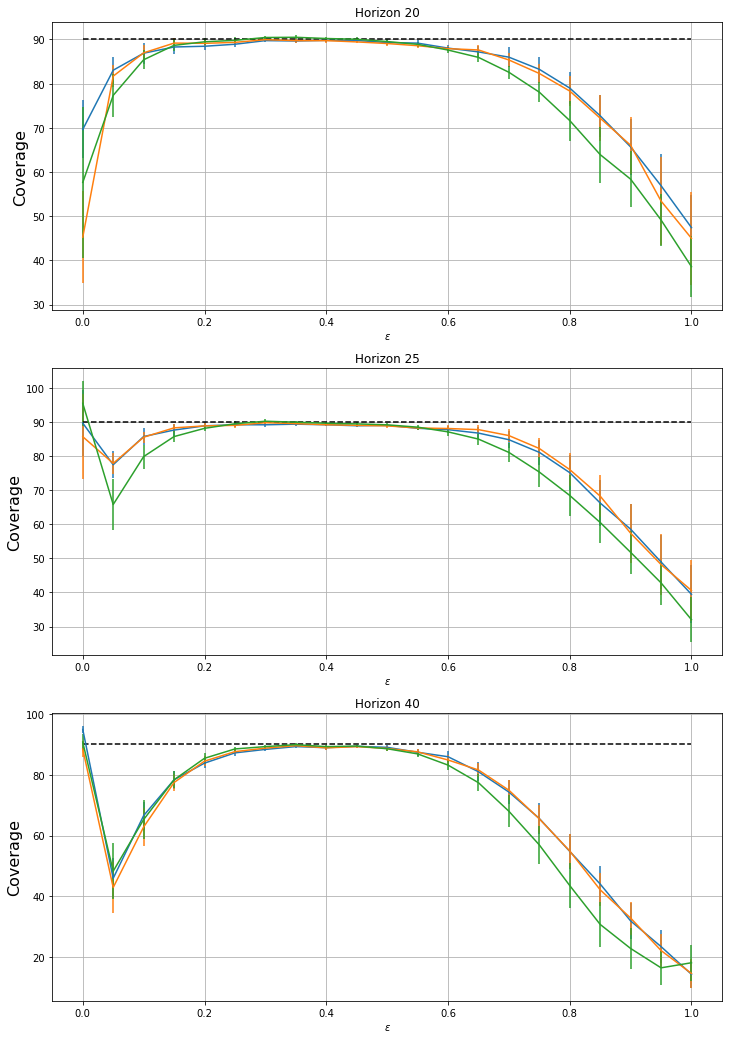

In [123]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(len(HORIZONS),1, figsize=(12, 18))


for i in range(len(HORIZONS)):
    #ce = compute_CE(horizon_lengths[i], horizon_coverage_std[i], num_runs[i])
    #line = ax[i,0].errorbar(epsilons, horizon_lengths[i], ce)
    
    #ce = compute_CE(horizon_lengths_double[i], horizon_lengths_std_double[i], num_runs[i])
    #line = ax[i,0].errorbar(epsilons, horizon_lengths_double[i],ce)
    

    #ce = compute_CE(horizon_lengths_cumul[i], horizon_lengths_std_cumul[i], num_runs[i])
    #line = ax[i,0].errorbar(epsilons, horizon_lengths_cumul[i], ce)
    
    #ax[i,0].set_xlabel('$\epsilon$')
    #ax[i,0].set_ylabel('Interval length', fontsize=16)
    #ax[i,0].grid()
    
    ax[i].plot(epsilons, np.ones(len(epsilons)) * 90, '--k')


    ce = compute_CE(horizon_coverage[i], horizon_coverage_std[i], num_runs[i])
    line = ax[i].errorbar(epsilons, horizon_coverage[i], ce)
    if i == 0:
        line.set_label(f"Symmetric method")
    
    ce = compute_CE(horizon_coverage_double[i], horizon_coverage_std_double[i], num_runs[i])
    line = ax[i].errorbar(epsilons, horizon_coverage_double[i], ce)
    if i == 0:
        line.set_label(f"Double method")

    ce = compute_CE(horizon_coverage_cumul[i], horizon_coverage_std_cumul[i], num_runs[i])
    line = ax[i].errorbar(epsilons, horizon_coverage_cumul[i], ce)
    if i == 0:
        line.set_label(f"Cumul method")

    ax[i].set_xlabel('$\epsilon$')
    ax[i].set_ylabel('Coverage', fontsize=16)
    ax[i].grid()
    #ax[i,0].set_title(f'Horizon {HORIZONS[i]}')
    ax[i].set_title(f'Horizon {HORIZONS[i]}')
#ax[0].legend()
#fig.suptitle("Coverage - Empirical method - Conformal Prediction")
#plt.savefig('figures/inventory/coverage_empirical_conformal.pdf')

In [124]:
def fetch_results(horizon: int, method: str):
    files = []
    for file in glob.glob(f"results/inventory/{method}/horizon_{horizon}/*IS.csv"):
        files.append(file)
    return files

def compute_CE(mu, std, N: int, c = 0.95):
    alpha = c + (1-c)/2
    c = tstudent.ppf(alpha, N)
    return c * std/ np.sqrt(N)

METHODS = ['empirical']
HORIZONS = [20,25,40]
epsilons = np.linspace(0, 1, 21)
scores_names = []
data = {}

for method in METHODS:
    data[method] = {}
    for horizon in HORIZONS:
        files = fetch_results(horizon, method)
        data[method][horizon] = {}
        for file_id, file in enumerate(files):
            data[method][horizon][file_id] = pd.read_csv('./' + file)
            data[method][horizon][file_id] = data[method][horizon][file_id][(data[method][horizon][file_id]["epsilon"] >= 0.30) & (data[method][horizon][file_id]["epsilon"] <= 0.65)]

horizon_lengths = []
horizon_coverage = []
horizon_lengths_double = []
horizon_coverage_double = []
horizon_lengths_cumul = []
horizon_coverage_cumul = []
horizon_lengths_std = []
horizon_coverage_std = []
horizon_lengths_std_double = []
horizon_coverage_std_double = []
horizon_lengths_std_cumul = []
horizon_coverage_std_cumul = []
num_runs = []
#horizons = [5,10,15,20,25]

for method in METHODS:
    for horizon in HORIZONS:
        avg_length = []
        avg_length_double = []
        avg_length_cumul = []
        coverage = []
        coverage_double = []
        coverage_cumul = []
        files = fetch_results(horizon, method)
        for file_id, file in enumerate(files):

            avg_length = data[method][horizon][file_id]["avg_length"].to_numpy() if len(avg_length) == 0 else np.vstack((avg_length, data[method][horizon][file_id]["avg_length"].to_numpy()))
            avg_length_double = data[method][horizon][file_id]["avg_length_double"].to_numpy() if len(avg_length_double) == 0 else np.vstack((avg_length_double, data[method][horizon][file_id]["avg_length_double"].to_numpy()))
            avg_length_cumul = data[method][horizon][file_id]["avg_length_cumul"].to_numpy() if len(avg_length_cumul) == 0 else np.vstack((avg_length_cumul, data[method][horizon][file_id]["avg_length_cumul"].to_numpy()))

            coverage = data[method][horizon][file_id]["coverage"].to_numpy() if len(coverage) == 0 else np.vstack((coverage, data[method][horizon][file_id]["coverage"].to_numpy()))
            coverage_double = data[method][horizon][file_id]["coverage_double"].to_numpy() if len(coverage_double) == 0 else np.vstack((coverage_double, data[method][horizon][file_id]["coverage_double"].to_numpy()))
            coverage_cumul = data[method][horizon][file_id]["coverage_cumul"].to_numpy() if len(coverage_cumul) == 0 else np.vstack((coverage_cumul, data[method][horizon][file_id]["coverage_cumul"].to_numpy()))
        num_runs.append(len(files))
        horizon_lengths.append(np.mean(avg_length, 0))
        horizon_coverage.append(np.mean(coverage, 0))
        horizon_lengths_double.append(np.mean(avg_length_double, 0))
        horizon_coverage_double.append(np.mean(coverage_double, 0))
        horizon_lengths_cumul.append(np.mean(avg_length_cumul, 0))
        horizon_coverage_cumul.append(np.mean(coverage_cumul, 0))

        horizon_lengths_std.append(np.std(avg_length, 0))
        horizon_coverage_std.append(np.std(coverage, 0))
        horizon_lengths_std_double.append(np.std(avg_length_double, 0))
        horizon_coverage_std_double.append(np.std(coverage_double, 0))
        horizon_lengths_std_cumul.append(np.std(avg_length_cumul, 0))
        horizon_coverage_std_cumul.append(np.std(coverage_cumul, 0))

num_runs = np.array(num_runs)
horizon_lengths = np.array(horizon_lengths)
horizon_coverage = np.array(horizon_coverage)
horizon_lengths_double = np.array(horizon_lengths_double)
horizon_coverage_double = np.array(horizon_coverage_double)
horizon_lengths_cumul = np.array(horizon_lengths_cumul)
horizon_coverage_cumul = np.array(horizon_coverage_cumul)
horizon_lengths_std = np.array(horizon_lengths_std)
horizon_coverage_std = np.array(horizon_coverage_std)
horizon_lengths_std_double = np.array(horizon_lengths_std_double)
horizon_coverage_std_double = np.array(horizon_coverage_std_double)
horizon_lengths_std_cumul = np.array(horizon_lengths_std_cumul)
horizon_coverage_std_cumul = np.array(horizon_coverage_std_cumul)

In [125]:
#import matplotlib.pyplot as plt
#fig, ax = plt.subplots(len(HORIZONS),1, figsize=(12, 18))


for i in range(len(HORIZONS)):
    #ce = compute_CE(horizon_lengths[i], horizon_coverage_std[i], num_runs[i])
    #line = ax[i,0].errorbar(epsilons, horizon_lengths[i], ce)
    
    #ce = compute_CE(horizon_lengths_double[i], horizon_lengths_std_double[i], num_runs[i])
    #line = ax[i,0].errorbar(epsilons, horizon_lengths_double[i],ce)
    

    #ce = compute_CE(horizon_lengths_cumul[i], horizon_lengths_std_cumul[i], num_runs[i])
    #line = ax[i,0].errorbar(epsilons, horizon_lengths_cumul[i], ce)
    
    #ax[i,0].set_xlabel('$\epsilon$')
    #ax[i,0].set_ylabel('Interval length', fontsize=16)
    #ax[i,0].grid()
    
    ax[i].plot(epsilons, np.ones(len(epsilons)) * 90, '--k')


    ce = compute_CE(horizon_coverage[i], horizon_coverage_std[i], num_runs[i])
    line = ax[i].errorbar(epsilons, horizon_coverage[i], ce)
    if i == 0:
        line.set_label(f"Importance Sampling")

    ax[i].set_xlabel('$\epsilon$')
    ax[i].set_ylabel('Coverage', fontsize=16)
    ax[i].grid()
    #ax[i,0].set_title(f'Horizon {HORIZONS[i]}')
    ax[i].set_title(f'Horizon {HORIZONS[i]}')
ax[0].legend()
fig.suptitle("Coverage - Empirical method - Importance Sampling")
fig.savefig('figures/inventory/coverage_empirical_IS.pdf')

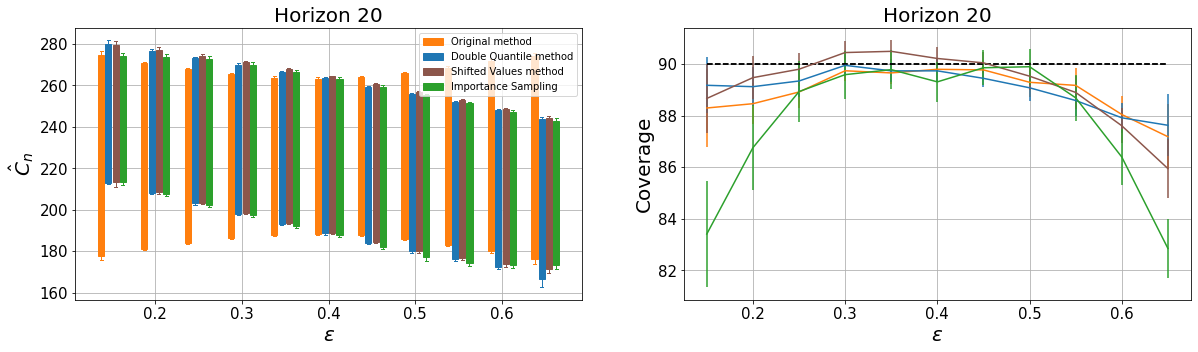

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
colors = ["tab:orange", "tab:blue", "tab:brown", "tab:green"]

def fetch_results(horizon: int, method: str):
    files = []
    for file in glob.glob(f"results/inventory/{method}/horizon_{horizon}/*conformal.csv"):
        files.append(file)
    return files

def compute_CE(mu, std, N: int, c = 0.95):
    alpha = c + (1-c)/2
    c = tstudent.ppf(alpha, N)
    return c * std/ np.sqrt(N)

METHODS = ['empirical']
HORIZONS = [20]
epsilons = np.linspace(0, 1, 21)
scores_names = []
data = {}

for method in METHODS:
    data[method] = {}
    for horizon in HORIZONS:
        files = fetch_results(horizon, method)
        data[method][horizon] = {}
        for file_id, file in enumerate(files):
            data[method][horizon][file_id] = pd.read_csv('./' + file)
            data[method][horizon][file_id] = data[method][horizon][file_id][(data[method][horizon][file_id]["epsilon"] >= 0.15) & (data[method][horizon][file_id]["epsilon"] <= 0.65)]
            epsilons = data[method][horizon][file_id]["epsilon"].to_numpy()

def compute_mean_std(key: str, method: str, horizon: int):
    mu = []
    std = []
    n = 0
    data_m_h = data[method][horizon]
    for id_run in data_m_h:
        n += 1
        mu.append(data_m_h[id_run][f'avg_{key}'].to_numpy())
        std.append(data_m_h[id_run][f'std_{key}'].to_numpy())
    
    mu = np.array(mu)
    std = np.array(std)
    return mu.mean(axis=0), mu.std(ddof=1,axis=0) + std.mean(axis=0), n

keys = {
    'Original method': {
        'lower': 'interval_target_lower',
        'upper': 'interval_target_upper',
        'color': 'tab:orange'
    },
    'Double Quantile method': {
        'lower': 'interval_target_double_lower',
        'upper': 'interval_target_double_upper',
        'color': 'tab:blue'
    },
    'Shifted Values method': {
        'lower': 'interval_target_cumul_lower',
        'upper': 'interval_target_cumul_upper',
        'color': 'tab:brown'
    }
    
}
     # if id > 0:
        #     plt.plot(epsilons, mu_lower_original)
        # else:
        #     plt.plot(epsilons, mu_lower_original, label = name)
        # plt.fill_between(
        #     epsilons,
        #     mu_lower_original - ce_lower_original,
        #     mu_lower_original + ce_lower_original, alpha=0.2)

bps = []
labels= []
for hid, horizon in enumerate(HORIZONS):
    for name_id, name in enumerate(keys):
        mu_lower_original, std_lower_original, n_lower_original = compute_mean_std(keys[name]['lower'], 'empirical', horizon)
        ce_lower_original = compute_CE(mu_lower_original, std_lower_original, n_lower_original)
        
        mu_upper_original, std_upper_original, n_upper_original = compute_mean_std(keys[name]['upper'], 'empirical', horizon)
        ce_upper_original = compute_CE(mu_upper_original, std_upper_original, n_upper_original)
    
        
        median = (mu_upper_original + mu_lower_original)/2
        boxes = [
            {
                'label' : name,
                'whislo': mu_lower_original[id] - ce_lower_original[id],    # Bottom whisker position
                'q1'    : mu_lower_original[id],    # First quartile (25th percentile)
                'med'   : median[id],    # Median         (50th percentile)
                'q3'    : mu_upper_original[id],    # Third quartile (75th percentile)
                'whishi': mu_upper_original[id] + ce_upper_original[id],    # Top whisker position
                'fliers': []        # Outliers
            }
            for id in range(len(epsilons))
        ]
        offset = -0.0125 + 0.0125/1.5 * name_id
        bp = ax[0].bxp(boxes, epsilons + offset, widths=0.007, showfliers=False, patch_artist=True, manage_ticks=False, showmeans=False)
        
        if hid == 0:
            bps.append(bp)
            labels.append(name)
        for element in ['boxes', 'whiskers', 'fliers', 'caps']:
            plt.setp(bp[element], color=keys[name]['color'])
            
        plt.setp(bp['medians'], linewidth=0)
        ax[0].grid()
        ax[0].set_title("Empirical method", fontsize = 20)
        ax[0].set_xlabel('$\epsilon$', fontsize = 20)
        ax[0].set_ylabel(r'$\hat C_n$', fontsize = 20)
        
    #ax.set_xticks(epsilons)
    
#ax[0].legend([bp["boxes"][0] for bp in bps], labels, loc='upper right')

#plt.xlabel(r'$\varepsilon$')
#plt.ylabel(r'$\hat C_n$')
#fig.suptitle("Confidence Intervals - Empirical method")
#fig.savefig('figures/inventory/Confidence_intervals_gradient_IS.pdf')
#plt.show()

def fetch_results(horizon: int, method: str):
    files = []
    for file in glob.glob(f"results/inventory/{method}/horizon_{horizon}/*IS.csv"):
        files.append(file)
    return files

def compute_CE(mu, std, N: int, c = 0.95):
    alpha = c + (1-c)/2
    c = tstudent.ppf(alpha, N)
    return c * std/ np.sqrt(N)

epsilons = np.linspace(0, 1, 21)
scores_names = []
data = {}

for method in METHODS:
    data[method] = {}
    for horizon in HORIZONS:
        files = fetch_results(horizon, method)
        data[method][horizon] = {}
        for file_id, file in enumerate(files):
            data[method][horizon][file_id] = pd.read_csv('./' + file)
            data[method][horizon][file_id] = data[method][horizon][file_id][(data[method][horizon][file_id]["epsilon"] >= 0.15) & (data[method][horizon][file_id]["epsilon"] <= 0.65)]
            epsilons = data[method][horizon][file_id]["epsilon"].to_numpy()

keys = {
    'Importance Sampling': {
        'lower': 'interval_target_lower',
        'upper': 'interval_target_upper',
        'color': 'tab:green'
    }
    
}
     # if id > 0:
        #     plt.plot(epsilons, mu_lower_original)
        # else:
        #     plt.plot(epsilons, mu_lower_original, label = name)
        # plt.fill_between(
        #     epsilons,
        #     mu_lower_original - ce_lower_original,
        #     mu_lower_original + ce_lower_original, alpha=0.2)

#fig, ax = plt.subplots(len(HORIZONS), figsize=(10,15))

#bps = []
#labels= []
for hid, horizon in enumerate(HORIZONS):
    for name_id, name in enumerate(keys):
        mu_lower_original, std_lower_original, n_lower_original = compute_mean_std(keys[name]['lower'], 'empirical', horizon)
        ce_lower_original = compute_CE(mu_lower_original, std_lower_original, n_lower_original)
        
        mu_upper_original, std_upper_original, n_upper_original = compute_mean_std(keys[name]['upper'], 'empirical', horizon)
        ce_upper_original = compute_CE(mu_upper_original, std_upper_original, n_upper_original)
    
        
        median = (mu_upper_original + mu_lower_original)/2
        boxes = [
            {
                'label' : name,
                'whislo': mu_lower_original[id] - ce_lower_original[id],    # Bottom whisker position
                'q1'    : mu_lower_original[id],    # First quartile (25th percentile)
                'med'   : median[id],    # Median         (50th percentile)
                'q3'    : mu_upper_original[id],    # Third quartile (75th percentile)
                'whishi': mu_upper_original[id] + ce_upper_original[id],    # Top whisker position
                'fliers': []        # Outliers
            }
            for id in range(len(epsilons))
        ]
        offset = -0.0125 + 0.0125/1.5 * 3
        bp = ax[0].bxp(boxes, epsilons + offset, widths=0.007, showfliers=False, patch_artist=True, manage_ticks=False, showmeans=False)
        
        if hid == 0:
            bps.append(bp)
            labels.append(name)
        for element in ['boxes', 'whiskers', 'fliers', 'caps']:
            plt.setp(bp[element], color=keys[name]['color'])
            
        plt.setp(bp['medians'], linewidth=0)
        #ax[hid].grid()
        #ax[hid].set_title(f'Horizon {horizon}')
        #ax[hid].set_ylabel(r'$\hat C_n$')
        
    #ax.set_xticks(epsilons)
    
ax[0].legend([bp["boxes"][0] for bp in bps], labels, loc='upper right')

#plt.xlabel(r'$\varepsilon$')
#plt.ylabel(r'$\hat C_n$')
#fig.suptitle("Confidence Intervals - Gradient method")
#fig.savefig('figures/inventory/Confidence_intervals_empirical_IS.pdf')
#plt.show()

def fetch_results(horizon: int, method: str):
    files = []
    for file in glob.glob(f"results/inventory/{method}/horizon_{horizon}/*conformal.csv"):
        files.append(file)
    return files

def compute_CE(mu, std, N: int, c = 0.95):
    alpha = c + (1-c)/2
    c = tstudent.ppf(alpha, N)
    return c * std/ np.sqrt(N)

epsilons = np.linspace(0, 1, 21)
scores_names = []
data = {}

for method in METHODS:
    data[method] = {}
    for horizon in HORIZONS:
        files = fetch_results(horizon, method)
        data[method][horizon] = {}
        for file_id, file in enumerate(files):
            data[method][horizon][file_id] = pd.read_csv('./' + file)
            data[method][horizon][file_id] = data[method][horizon][file_id][(data[method][horizon][file_id]["epsilon"] >= 0.15) & (data[method][horizon][file_id]["epsilon"] <= 0.65)]
            epsilons = data[method][horizon][file_id]["epsilon"].to_numpy()

horizon_lengths = []
horizon_coverage = []
horizon_lengths_double = []
horizon_coverage_double = []
horizon_lengths_cumul = []
horizon_coverage_cumul = []
horizon_lengths_std = []
horizon_coverage_std = []
horizon_lengths_std_double = []
horizon_coverage_std_double = []
horizon_lengths_std_cumul = []
horizon_coverage_std_cumul = []
num_runs = []
#horizons = [5,10,15,20,25]

for method in METHODS:
    for horizon in HORIZONS:
        avg_length = []
        avg_length_double = []
        avg_length_cumul = []
        coverage = []
        coverage_double = []
        coverage_cumul = []
        files = fetch_results(horizon, method)
        for file_id, file in enumerate(files):

            avg_length = data[method][horizon][file_id]["avg_length"].to_numpy() if len(avg_length) == 0 else np.vstack((avg_length, data[method][horizon][file_id]["avg_length"].to_numpy()))
            avg_length_double = data[method][horizon][file_id]["avg_length_double"].to_numpy() if len(avg_length_double) == 0 else np.vstack((avg_length_double, data[method][horizon][file_id]["avg_length_double"].to_numpy()))
            avg_length_cumul = data[method][horizon][file_id]["avg_length_cumul"].to_numpy() if len(avg_length_cumul) == 0 else np.vstack((avg_length_cumul, data[method][horizon][file_id]["avg_length_cumul"].to_numpy()))

            coverage = data[method][horizon][file_id]["coverage"].to_numpy() if len(coverage) == 0 else np.vstack((coverage, data[method][horizon][file_id]["coverage"].to_numpy()))
            coverage_double = data[method][horizon][file_id]["coverage_double"].to_numpy() if len(coverage_double) == 0 else np.vstack((coverage_double, data[method][horizon][file_id]["coverage_double"].to_numpy()))
            coverage_cumul = data[method][horizon][file_id]["coverage_cumul"].to_numpy() if len(coverage_cumul) == 0 else np.vstack((coverage_cumul, data[method][horizon][file_id]["coverage_cumul"].to_numpy()))
        num_runs.append(len(files))
        horizon_lengths.append(np.mean(avg_length, 0))
        horizon_coverage.append(np.mean(coverage, 0))
        horizon_lengths_double.append(np.mean(avg_length_double, 0))
        horizon_coverage_double.append(np.mean(coverage_double, 0))
        horizon_lengths_cumul.append(np.mean(avg_length_cumul, 0))
        horizon_coverage_cumul.append(np.mean(coverage_cumul, 0))

        horizon_lengths_std.append(np.std(avg_length, 0))
        horizon_coverage_std.append(np.std(coverage, 0))
        horizon_lengths_std_double.append(np.std(avg_length_double, 0))
        horizon_coverage_std_double.append(np.std(coverage_double, 0))
        horizon_lengths_std_cumul.append(np.std(avg_length_cumul, 0))
        horizon_coverage_std_cumul.append(np.std(coverage_cumul, 0))

num_runs = np.array(num_runs)
horizon_lengths = np.array(horizon_lengths)
horizon_coverage = np.array(horizon_coverage)
horizon_lengths_double = np.array(horizon_lengths_double)
horizon_coverage_double = np.array(horizon_coverage_double)
horizon_lengths_cumul = np.array(horizon_lengths_cumul)
horizon_coverage_cumul = np.array(horizon_coverage_cumul)
horizon_lengths_std = np.array(horizon_lengths_std)
horizon_coverage_std = np.array(horizon_coverage_std)
horizon_lengths_std_double = np.array(horizon_lengths_std_double)
horizon_coverage_std_double = np.array(horizon_coverage_std_double)
horizon_lengths_std_cumul = np.array(horizon_lengths_std_cumul)
horizon_coverage_std_cumul = np.array(horizon_coverage_std_cumul)

for i in range(len(HORIZONS)):
    
    ax[1].plot(epsilons, np.ones(len(epsilons)) * 90, '--k')


    ce = compute_CE(horizon_coverage[i], horizon_coverage_std[i], num_runs[i])
    line = ax[1].errorbar(epsilons, horizon_coverage[i], ce, ecolor = colors[0], color = colors[0])
    if i == 0:
        line.set_label(f"Symmetric method")
    
    ce = compute_CE(horizon_coverage_double[i], horizon_coverage_std_double[i], num_runs[i])
    line = ax[1].errorbar(epsilons, horizon_coverage_double[i], ce, ecolor = colors[1], color = colors[1])
    if i == 0:
        line.set_label(f"Double method")

    ce = compute_CE(horizon_coverage_cumul[i], horizon_coverage_std_cumul[i], num_runs[i])
    line = ax[1].errorbar(epsilons, horizon_coverage_cumul[i], ce, ecolor = colors[2], color = colors[2])
    if i == 0:
        line.set_label(f"Cumul method")

    #ax[1].set_xlabel('$\epsilon$')
    #ax[1].set_ylabel('Coverage')
    ax[1].grid()
    #ax[i,0].set_title(f'Horizon {HORIZONS[i]}')
    #ax[1].set_title("Empirical Method")

def fetch_results(horizon: int, method: str):
    files = []
    for file in glob.glob(f"results/inventory/{method}/horizon_{horizon}/*IS.csv"):
        files.append(file)
    return files

def compute_CE(mu, std, N: int, c = 0.95):
    alpha = c + (1-c)/2
    c = tstudent.ppf(alpha, N)
    return c * std/ np.sqrt(N)

epsilons = np.linspace(0, 1, 21)
scores_names = []
data = {}

for method in METHODS:
    data[method] = {}
    for horizon in HORIZONS:
        files = fetch_results(horizon, method)
        data[method][horizon] = {}
        for file_id, file in enumerate(files):
            data[method][horizon][file_id] = pd.read_csv('./' + file)
            data[method][horizon][file_id] = data[method][horizon][file_id][(data[method][horizon][file_id]["epsilon"] >= 0.15) & (data[method][horizon][file_id]["epsilon"] <= 0.65)]
            epsilons = data[method][horizon][file_id]["epsilon"].to_numpy()

horizon_lengths = []
horizon_coverage = []
horizon_lengths_double = []
horizon_coverage_double = []
horizon_lengths_cumul = []
horizon_coverage_cumul = []
horizon_lengths_std = []
horizon_coverage_std = []
horizon_lengths_std_double = []
horizon_coverage_std_double = []
horizon_lengths_std_cumul = []
horizon_coverage_std_cumul = []
num_runs = []
#horizons = [5,10,15,20,25]

for method in METHODS:
    for horizon in HORIZONS:
        avg_length = []
        avg_length_double = []
        avg_length_cumul = []
        coverage = []
        coverage_double = []
        coverage_cumul = []
        files = fetch_results(horizon, method)
        for file_id, file in enumerate(files):

            avg_length = data[method][horizon][file_id]["avg_length"].to_numpy() if len(avg_length) == 0 else np.vstack((avg_length, data[method][horizon][file_id]["avg_length"].to_numpy()))
            avg_length_double = data[method][horizon][file_id]["avg_length_double"].to_numpy() if len(avg_length_double) == 0 else np.vstack((avg_length_double, data[method][horizon][file_id]["avg_length_double"].to_numpy()))
            avg_length_cumul = data[method][horizon][file_id]["avg_length_cumul"].to_numpy() if len(avg_length_cumul) == 0 else np.vstack((avg_length_cumul, data[method][horizon][file_id]["avg_length_cumul"].to_numpy()))

            coverage = data[method][horizon][file_id]["coverage"].to_numpy() if len(coverage) == 0 else np.vstack((coverage, data[method][horizon][file_id]["coverage"].to_numpy()))
            coverage_double = data[method][horizon][file_id]["coverage_double"].to_numpy() if len(coverage_double) == 0 else np.vstack((coverage_double, data[method][horizon][file_id]["coverage_double"].to_numpy()))
            coverage_cumul = data[method][horizon][file_id]["coverage_cumul"].to_numpy() if len(coverage_cumul) == 0 else np.vstack((coverage_cumul, data[method][horizon][file_id]["coverage_cumul"].to_numpy()))
        num_runs.append(len(files))
        horizon_lengths.append(np.mean(avg_length, 0))
        horizon_coverage.append(np.mean(coverage, 0))
        horizon_lengths_double.append(np.mean(avg_length_double, 0))
        horizon_coverage_double.append(np.mean(coverage_double, 0))
        horizon_lengths_cumul.append(np.mean(avg_length_cumul, 0))
        horizon_coverage_cumul.append(np.mean(coverage_cumul, 0))

        horizon_lengths_std.append(np.std(avg_length, 0))
        horizon_coverage_std.append(np.std(coverage, 0))
        horizon_lengths_std_double.append(np.std(avg_length_double, 0))
        horizon_coverage_std_double.append(np.std(coverage_double, 0))
        horizon_lengths_std_cumul.append(np.std(avg_length_cumul, 0))
        horizon_coverage_std_cumul.append(np.std(coverage_cumul, 0))

num_runs = np.array(num_runs)
horizon_lengths = np.array(horizon_lengths)
horizon_coverage = np.array(horizon_coverage)
horizon_lengths_double = np.array(horizon_lengths_double)
horizon_coverage_double = np.array(horizon_coverage_double)
horizon_lengths_cumul = np.array(horizon_lengths_cumul)
horizon_coverage_cumul = np.array(horizon_coverage_cumul)
horizon_lengths_std = np.array(horizon_lengths_std)
horizon_coverage_std = np.array(horizon_coverage_std)
horizon_lengths_std_double = np.array(horizon_lengths_std_double)
horizon_coverage_std_double = np.array(horizon_coverage_std_double)
horizon_lengths_std_cumul = np.array(horizon_lengths_std_cumul)
horizon_coverage_std_cumul = np.array(horizon_coverage_std_cumul)

#import matplotlib.pyplot as plt
#fig, ax = plt.subplots(len(HORIZONS),1, figsize=(12, 18))


for i in range(len(HORIZONS)):
    
    ax[1].plot(epsilons, np.ones(len(epsilons)) * 90, '--k')


    ce = compute_CE(horizon_coverage[i], horizon_coverage_std[i], num_runs[i])
    line = ax[1].errorbar(epsilons, horizon_coverage[i], ce, ecolor=colors[3], color = colors[3])
    if i == 0:
        line.set_label(f"Importance Sampling")

    ax[1].set_xlabel('$\epsilon$', fontsize = 20)
    ax[1].set_ylabel('Coverage', fontsize = 20)
    #ax[1].grid()
    
#ax[1].legend()

#ax[0].set_ylim(160, 550)
#ax[1].set_ylim(60, 100)
#fig.suptitle("Inventory Problem - Inventory size 10 - Horizon 40")
ax[0].set_title("Horizon 20", fontsize = 20)
ax[1].set_title("Horizon 20", fontsize = 20)
ax[0].tick_params("both", labelsize=15)
ax[1].tick_params("both", labelsize=15)
fig.savefig('figures/inventory/Horizon_20.pdf')

#160 550
#60 100